<a href="https://colab.research.google.com/github/Selenas02/TestRepository/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do a scatterplot of each subject's left telencephalon **(type 1 level 1) volume** by their right (left on the vertical axis and right on the horizontal). The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv) 
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. 
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that 
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 

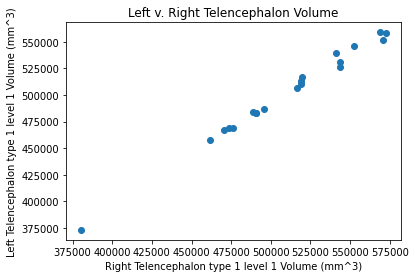

In [21]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#importing data to plot
kirby21data = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv')

#PART 1: scatterplot of each subject's left telencephalon (type 1 level 1) volume by their right 


#creating empty arrays to store left and right telecephalon data
left_tele_vols = []
right_tele_vols = []


# Extract the Type 1 Level 1 data
t1l1 = kirby21data.loc[(kirby21data.type == 1) & (kirby21data.level == 1)]

#putting left and right tele data into arrays 
tele_left = np.asarray(kirby21data[kirby21data['roi'] == 'Telencephalon_L'])
tele_right = np.asarray(kirby21data[kirby21data['roi'] == 'Telencephalon_R'])

#appending the volume values into respective arrays
for x in range(len(tele_left)):
    left_tele_vols.append(tele_left[x][3])
    right_tele_vols.append(tele_right[x][3])

#sns.scatterplot(left_tele_vols = 'Telencephalon_L', right_tele_vols = 'Telencephalon_R', data = t1l1)

#plotting the Telencephalon volumes with right on the x axis and left on the y axis
plt.figure()
plt.scatter(right_tele_vols, left_tele_vols)

plt.ylabel('Left Telencephalon type 1 level 1 Volume (mm^3)')
plt.xlabel('Right Telencephalon type 1 level 1 Volume (mm^3)')

plt.title('Left v. Right Telencephalon Volume')
plt.show()




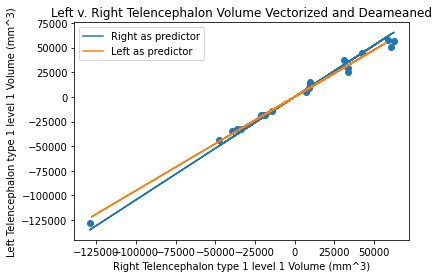

In [23]:
# PART 2: vectorizing and demeaning data

#taking the mean of left and right volumes
left_tele_mean = np.mean(left_tele_vols)
right_tele_mean = np.mean(right_tele_vols)

#vectorizing each 
left_vector = left_tele_vols - left_tele_mean
right_vector = right_tele_vols - right_tele_mean

#fitting to a linear regression model
linreg1 = linear_model.LinearRegression()
linreg1model = linreg1.fit(right_vector.reshape((-1,1)), left_vector)

linreg2 = linear_model.LinearRegression()
linreg2model = linreg2.fit(left_vector.reshape((-1,1)), right_vector)

right_vector_coef = right_vector * linreg2model.coef_
left_vector_coef = left_vector * linreg1model.coef_

#plotting
plt.figure()
plt.scatter(right_vector, left_vector)
plt.plot(right_vector, right_vector_coef)
plt.plot(left_vector, left_vector_coef)


plt.title('Left v. Right Telencephalon Volume Vectorized and Deameaned')

plt.ylabel('Left Telencephalon type 1 level 1 Volume (mm^3)')
plt.xlabel('Right Telencephalon type 1 level 1 Volume (mm^3)')

plt.legend(['Right as predictor', 'Left as predictor'])

#### Part 3: Consider a regression through the origin model  Y=BX . What would be the impact on the estimate of  B  if we replaced  X  by  cX  where  c  is a positive constant?

First lets solve for $\beta$:

$$
l = \sum_i ( Y_i - \beta X_i)^2
$$

Taking a derivative of $l$ with respect to $\beta$ gives us:  

$$
l' = - \sum_i 2 (Y_i - \beta X_i) X_i.
$$

Setting this equation equal to zero and solving for $\beta$ we obtain:

$$
\hat \beta = \frac{\sum_i (Y_i * X_i)}{\sum_i X_i^2} 
$$

Now, to replace X by cx, let X = cX

$$
\hat \beta = \frac{\sum_i (Y_i * cX_i)}{\sum_i (cX_i)^2}  = \frac{c\sum_i (Y_i * X_i)}{c^2\sum_i (X_i)^2}
$$

Now simplifying this expression through cancelling out c in the numerator, we obtain: 

$$
\hat \beta = \frac{\sum_i (Y_i * X_i)}{c\sum_i (X_i)^2}
$$

Using the definition of $\beta$ as defined above, we can see that:

$$
\hat \beta = \frac{\sum_i (Y_i * X_i)}{c\sum_i (X_i)^2} = \beta/ c
$$

This expression proves that if X is multiplied by a factor of c then $\beta$ will be inversely affected (divided by a factor of c) in order to maintain equality in the equation. 


#### Part 4: Let $X_i$ be a group indicator so that 
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 